##  Case Study Project - Food Claims Process

a) Data Validation

The Vivendo fast food Dataset will be imported into Jupyter notebook for Data Validation

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load Vivendo claim dataset into jupyter

claim_df = pd.read_csv('C:/Users/YINKA ADEWUNI/Documents/Projects/claims.csv')

In [3]:
# Inspect the first five rows
claim_df.head()

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,"R$50,000.00",34297.47,RECIFE,2,False,NaN
1,0000000-00.2011.0.00.0086,3591,"R$180,000.00",56383.54,SAO LUIS,7,False,NaN
2,0000000-00.2012.0.00.0092,2997,"R$70,000.00",12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,"R$95,104.00",29217.16,FORTALEZA,4,False,NaN
4,0000000-00.2014.0.00.0097,117,"R$29,000.00",12610.50,FORTALEZA,1,False,meat


In [4]:
# Find out the total number of rows and columns of the dataset

claim_df.shape

(98, 8)

It can be seen that there are 98 records and 8 features

In [5]:
# Inspect the data types of the features

claim_df.dtypes

Claim ID                 object
Time to Close             int64
Claim Amount             object
Amount Paid             float64
Location                 object
Individuals on Claim      int64
Linked Cases               bool
Cause                    object
dtype: object

In [6]:
# Data cleaning of the Claim Amount column to remove 'R','$' and ','
claim_df['Claim Amount'] = claim_df['Claim Amount'].str.replace('R','')
claim_df['Claim Amount'] = claim_df['Claim Amount'].str.replace('$','')
claim_df['Claim Amount'] = claim_df['Claim Amount'].str.replace(',','')
claim_df['Claim Amount'] = claim_df['Claim Amount'].astype(float)

C:\Users\YINKA ADEWUNI\AppData\Local\Temp\ipykernel_13756\2206982051.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  claim_df['Claim Amount'] = claim_df['Claim Amount'].str.replace('$','')


In [7]:
claim_df['Claim Amount'].head()

0     50000.0
1    180000.0
2     70000.0
3     95104.0
4     29000.0
Name: Claim Amount, dtype: float64

In [8]:
claim_df['Cause'] = claim_df['Cause'].fillna('unknown')
claim_df['Cause'].head()

0       unknown
1       unknown
2    vegetables
3       unknown
4          meat
Name: Cause, dtype: object

In [9]:
# Are there other missing values?

claim_df.isnull().sum()

Claim ID                0
Time to Close           0
Claim Amount            0
Amount Paid             0
Location                0
Individuals on Claim    0
Linked Cases            0
Cause                   0
dtype: int64

In [10]:
claim_df.dtypes

Claim ID                 object
Time to Close             int64
Claim Amount            float64
Amount Paid             float64
Location                 object
Individuals on Claim      int64
Linked Cases               bool
Cause                    object
dtype: object

It can be seen that the data now has been cleaned. No missing values and they have the right data types

**Data Discovery and Visualization**

How does the number of claims differ across locations?

In [11]:
claim_df['Location'].value_counts()

SAO LUIS     30
RECIFE       25
FORTALEZA    22
NATAL        21
Name: Location, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


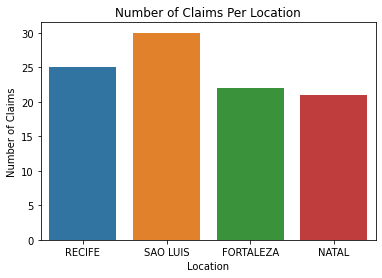

In [12]:
# Visualize the number of claims per location using the seaborn countplot

g = sns.countplot(claim_df['Location'])
g.set_title('Number of Claims Per Location')
g.set_ylabel('Number of Claims')

plt.savefig('C:/Users/YINKA ADEWUNI/Documents/Pics/countplot.jpg')


**What is the distribution of time to close claims?**

In [13]:
claim_df['Time to Close'].describe()  

count      98.000000
mean      832.346939
std       686.851131
min       -57.000000
25%       340.750000
50%       638.500000
75%      1138.750000
max      3591.000000
Name: Time to Close, dtype: float64

It can be seen that the minimum 'Time to Close' is -57 which obviously can't be correct since the 'Time to Close' must be a positive number that tells the number it takes to process the claim. The records must be investigated further to see if there are more negative values.

In [14]:
claim_df[claim_df['Time to Close'] <= 0] 

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
58,0000000-00.2019.0.00.0079,-57,3672.0,999.68,SAO LUIS,0,False,unknown


There is only one row where the 'Time to Close' is negative. It might be due to wrong computation. It will be replaced with postive 57.

In [15]:
claim_df.set_index('Claim ID')
claim_df.head(2)

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,50000.0,34297.47,RECIFE,2,False,unknown
1,0000000-00.2011.0.00.0086,3591,180000.0,56383.54,SAO LUIS,7,False,unknown


In [16]:
claim_df.loc[claim_df['Time to Close'] == -57, 'Time to Close'] = 57

In [17]:
#Confirm if any negative value in the 'Time to Close' column

claim_df['Time to Close'].describe() # Negative value been replacfed successfully

count      98.000000
mean      833.510204
std       685.424441
min        29.000000
25%       340.750000
50%       638.500000
75%      1138.750000
max      3591.000000
Name: Time to Close, dtype: float64

In [18]:
claim_df.reset_index()

,index,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0,0000000-00.2010.0.00.0094,2082,50000.0,34297.47,RECIFE,2,False,unknown
1,1,0000000-00.2011.0.00.0086,3591,180000.0,56383.54,SAO LUIS,7,False,unknown
2,2,0000000-00.2012.0.00.0092,2997,70000.0,12366.76,SAO LUIS,3,False,vegetables
3,3,0000000-00.2013.0.00.0096,1143,95104.0,29217.16,FORTALEZA,4,False,unknown
4,4,0000000-00.2014.0.00.0097,117,29000.0,12610.50,FORTALEZA,1,False,meat
...,...,...,...,...,...,...,...,...,...
93,93,0000000-00.2020.0.00.0023,208,80396.0,40668.14,FORTALEZA,3,False,meat
94,94,0000000-00.2020.0.00.0057,86,50000.0,8363.96,FORTALEZA,2,False,unknown
95,95,0000000-00.2020.0.00.0010,201,60000.0,42318.80,NATAL,2,False,unknown
96,96,0000000-00.2020.0.00.0059,200,474542.0,329473.49,NATAL,20,True,unknown


<Figure size 864x720 with 0 Axes>

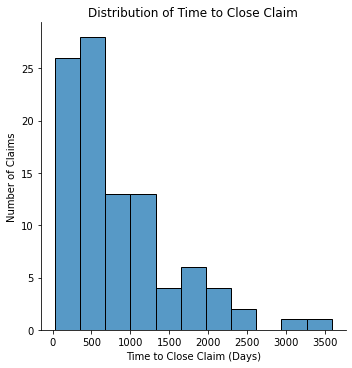

In [22]:
plt.figure(figsize = (12,10))

sns. displot(claim_df['Time to Close'])
plt.title('Distribution of Time to Close Claim')
plt.ylabel('Number of Claims')
plt.xlabel('Time to Close Claim (Days)')



plt.savefig('C:/Users/YINKA ADEWUNI/Documents/Pics/displot.jpg')

**How does the average time to close claims differ by location?**

In [20]:
Location_ttclose = claim_df.groupby('Location')['Time to Close'].mean()
Location_ttclose

Location
FORTALEZA     775.500000
NATAL         581.142857
RECIFE        860.680000
SAO LUIS     1030.066667
Name: Time to Close, dtype: float64

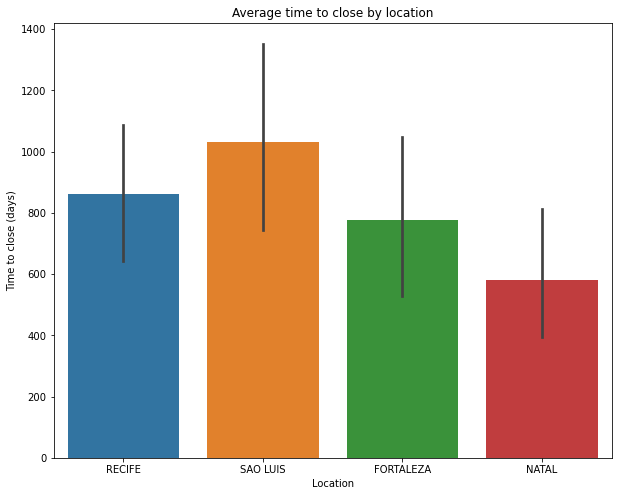

In [21]:
plt.figure(figsize = (10,8))

sns.barplot(data =claim_df, x = 'Location', y ='Time to Close')
plt.title('Average time to close by location')
plt.ylabel('Time to close (days)')
plt.xlabel('Location')

plt.savefig('C:/Users/YINKA ADEWUNI/Documents/Pics/barplot.jpg')

In [23]:
Location_claim= claim_df.groupby('Location')['Claim Amount'].sum()
Location_claim

Location
FORTALEZA    1825506.0
NATAL        4045193.0
RECIFE       2688374.0
SAO LUIS     3490226.0
Name: Claim Amount, dtype: float64

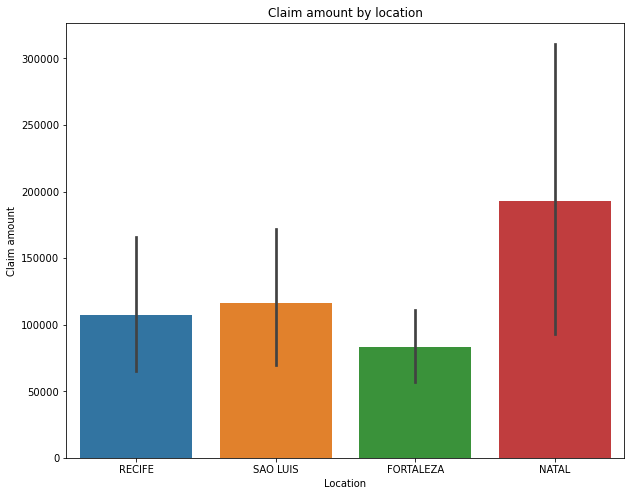

In [28]:
plt.figure(figsize = (10,8))

sns.barplot(claim_df['Location'], claim_df['Claim Amount'])
plt.title('Claim amount by location')
plt.ylabel('Claim amount')
plt.xlabel('Location')

plt.savefig('C:/Users/YINKA ADEWUNI/Documents/Pics/barplot2.jpg')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


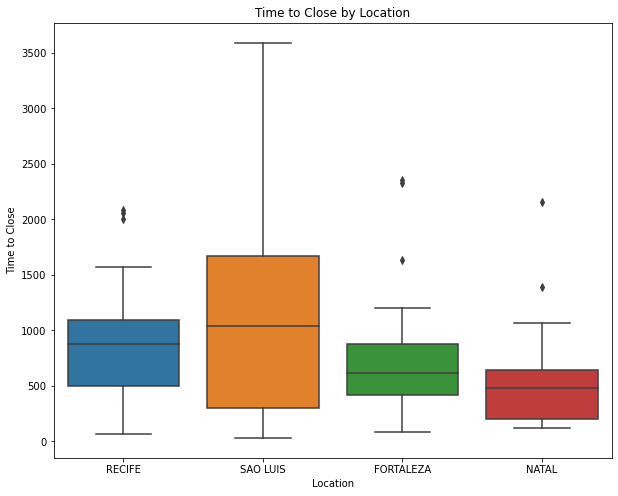

In [29]:
plt.figure(figsize = (10,8))

sns.boxplot(claim_df['Location'], claim_df['Time to Close'])
plt.title('Time to Close by Location')
plt.ylabel('Time to Close')
plt.xlabel('Location')

plt.savefig('C:/Users/YINKA ADEWUNI/Documents/Pics/boxplot.jpg')